In [46]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import galsim
import numpy as np
from fpfs import pltutil
import lsst.afw.image as afwImg
from descwl_shear_sims.sim import make_sim
from descwl_shear_sims.surveys import get_survey, get_wldeblend_rescale_fac
from descwl_shear_sims.galaxies import WLDeblendGalaxyCatalog  # one of the galaxy catalog classes
from descwl_shear_sims.psfs import make_ps_psf,make_fixed_psf  # for making a power spectrum PSF
from descwl_shear_sims.sim import get_se_dim  # convert coadd dims to SE dims

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0.3150796795795606
0.3713810487606338
0.5957392307960843
1.1550156050041647
2.680195928559839


[Text(0, 0, 'g'),
 Text(1, 0, 'r'),
 Text(2, 0, 'i'),
 Text(3, 0, 'z'),
 Text(4, 0, 'y')]

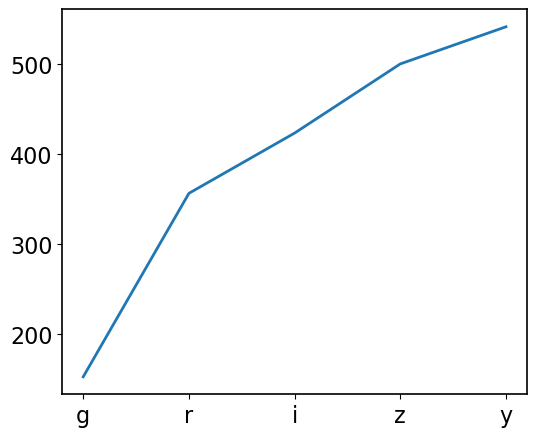

In [50]:
galaxy_catalog = WLDeblendGalaxyCatalog(
    rng=rng,
    coadd_dim=coadd_dim,
    buff=buff,
    layout='random_disk',
)


nlist = []
psf = make_fixed_psf(psf_type='moffat')
for bb in ['g', 'r', 'i', 'z', 'y']:
    survey = get_survey(gal_type=galaxy_catalog.gal_type, band=bb)
    scale = get_wldeblend_rescale_fac(survey.descwl_survey)
    print(survey.noise*scale)
    nlist.append(survey.noise)
nlist= np.array(nlist)

fig, axes = pltutil.make_figure_axes(nx=1,ny=1)
ax= axes[0]
ax.plot(np.arange(5), nlist)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(['g', 'r', 'i', 'z', 'y'])

In [36]:
a = 'field00000_shear1-0_rot0_i.fits'

In [41]:
eval(a.split('field')[-1].split('_')[0])+212

212

In [51]:
a=pyfits.getdata('/lustre/work/xiangchong.li/work/FPFS2/sim_desc/test2_basic/field00000_shear1-0_rot0_i.fits')

In [53]:
np.std(a,)

4.159433